### 1. 목표
- 군집 알고리즘 살펴보기(k-means, DBSCAN)
- 군집 평가방법 이해

#### 1.1 군집알고리즘

- k-means
    - 지정된 k 개수만큼 군집을 형성
    - 군집이 중심점을 데이터의 평균쪽으로 이동시키는 특징
    - 군집형태가 원형으로 형성되는 경우가 많다
- DESCAN(밀도기반군집)
    - 설정된 탐색범위, 최소갯수를 이용해서 밀집된 데이터들을 묶어주는 군집알고리즘
    - 데이터의 패턴이 특이한 경우에도 군집이 잘 형성된다. (이상치 찾는데에도 좋다)

![image (1)](https://user-images.githubusercontent.com/108103279/194205389-52131108-f784-4ac7-9521-9b024ab0786b.png)

#### 1.2 군집평가방법
- 엘보우 평가
    - 군집의 갯수를 늘려가면서 군집의 중심과 타 데이터 사이의 거리값들의 변화를 확인하는 방법


![image (2)](https://user-images.githubusercontent.com/108103279/194205680-042b8383-0418-4619-aa23-e7e50c0c2e1c.png)

- 실루엣 계수평가
    - 같은 군집내의 데이터의 거리값(작을수록 좋다.)
    - 타 군집내의 데이터의 거리값의 평균(클수록 좋다.)

![image (3)](https://user-images.githubusercontent.com/108103279/194205682-766cdd2d-e65c-4107-8c2b-ba4e54d9a825.png)

#### 1.3 군집 실습

In [8]:
from sklearn.datasets import make_circles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False
    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        plt.scatter(x=label_cluster['x1'], y=label_cluster['x2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    plt.legend(loc=legend_loc)
    plt.show()

In [18]:
# k-means 사용하기
X,y = make_circles(n_samples=1000, # 만들 데이터 포인트 수
                    shuffle=True, #데이터를 섞어주기
                    noise=0.05, # 데이터의 노이즈 정도(수를 크게줄수록 데이터 퍼짐0
                    random_state=0,
                    factor=0.5) # 두 원사이의 간격
clusterDF = pd.DataFrame(X,columns=['x1','x2'])
clusterDF['target'] = y

clusterDF.head()

,x1,x2,target
0,0.519781,-0.015981,1
1,-0.057719,-0.420279,1
2,-0.805155,-0.662227,0
3,0.316549,0.312730,1
4,-0.304804,0.407563,1


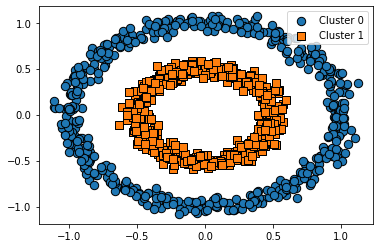

In [19]:
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

In [20]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans.fit(X)

c:\Users\pipi1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(max_iter=1000, n_clusters=2, random_state=0)

In [23]:
kmeans.cluster_centers_ # 형성된 군집의 중심좌표

array([[ 0.08713305, -0.47073892],
       [-0.08660641,  0.47325652]])

In [24]:
# kmeans가 찾아낸 군집으로 예측
kmeans_labels = kmeans.predict(X)

In [25]:
clusterDF['kmeans_target'] = kmeans_labels

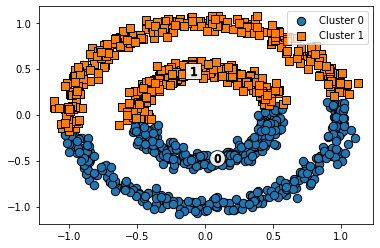

In [30]:
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_target', iscenter=True)

In [31]:
# DBSCAN 군집
from sklearn.cluster import DBSCAN

In [33]:
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_target = dbscan.fit_predict(X) # 학습 및 예측


In [34]:
clusterDF['dbscan_target'] = dbscan_target

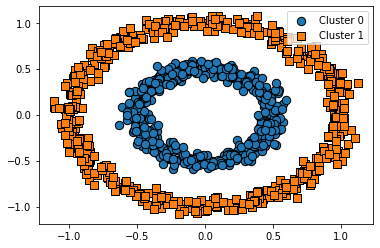

In [35]:
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_target', iscenter=False)